# fourier transforms

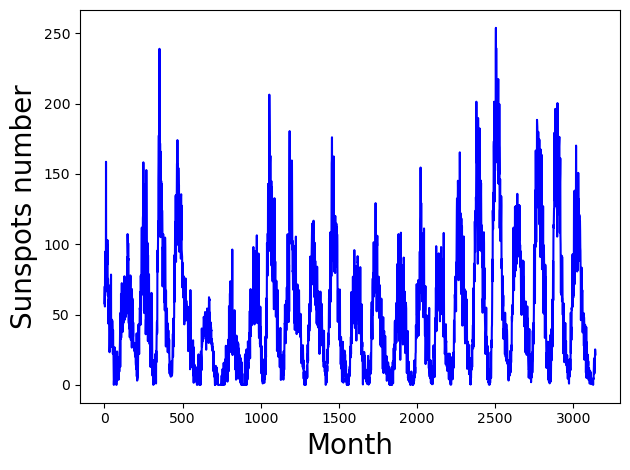

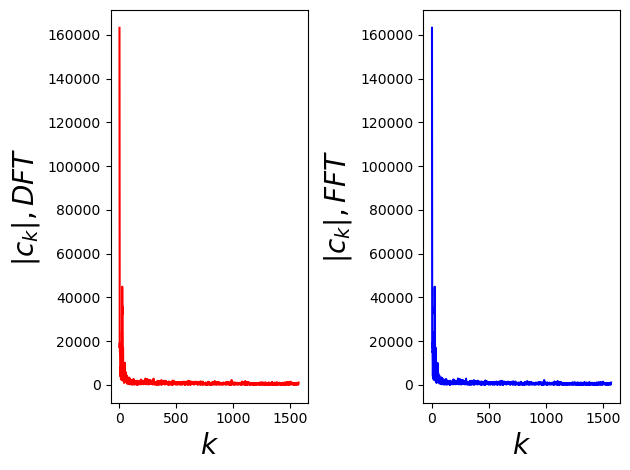

The frequency corresponding to the largest  c_k is: 0.007636016544702514 1/months, where c_kmax= 44881.36725103272
Hence the corresponding period is: 10.913194444444443 yr


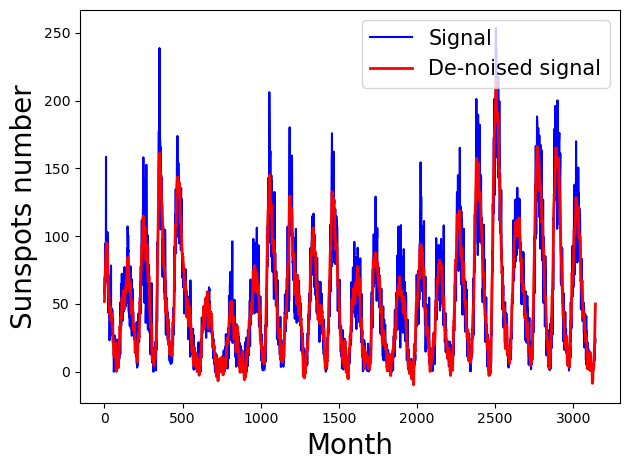

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 22 17:11:58 2020

@author: astro
"""

import numpy as np
import math as mt
import cmath as cmt   #it defines functions for the complex plane
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft

#FFT to calculate Fourier transform of sunspots.txt

#fname=str('sunspots.txt')
fname=str('sunspots.txt')
#array creation:
month=np.genfromtxt(fname, dtype="float", usecols=(0), comments='#')
sunspots=np.genfromtxt(fname, dtype="float", usecols=(1), comments='#')
m=range(len(sunspots))
N=len(sunspots)

#plot number of sunspots versus month
plt.plot(month, sunspots, color='b')
plt.xlabel("Month", fontsize=20)
plt.ylabel("Sunspots number", fontsize=20)
plt.tight_layout()
plt.show()

#######calculating Fourier Transform with DFT
def dft(y):
    cvector=[]
    for k in range(0,N//2+1):
        ck=0
        for n in range(0,N-1):
            ck+=y[n]*cmt.exp(-1j*2*cmt.pi*k*n/N) #expresion for DFT
        cvector.append(ck)
    return cvector

c1=dft(sunspots)
c1=np.array(c1)
c1abs=(abs(c1))
maxc1=0.0
maxk1=0

###################calculating Fourier Transform with FFT
c=rfft(sunspots)
cabs=(abs(c))
kvector=[]
maxc=0.0
maxk=0

#calculating frequency k/N corresponding to the max c_k
for k in range(N//2+1):   #for DFT
    if((c1abs[k]>maxc1) and (k>0)):
        maxc1=cabs[k]
        maxk1=k/float(N)  #frequency

    
for k in range(N//2+1):   #for FFT
    if((cabs[k]>maxc) and (k>0)):
        maxc=cabs[k]
        maxk=k/float(N)  #frequency
        T=1./maxk #period
    kvector.append(k)

#plots |ck| versus k
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(kvector,c1abs,color='r')  #DFT
ax2.plot(kvector, cabs, color='b')  #FFT
ax1.set_xlabel("$k$", fontsize=20)
ax1.set_ylabel("$|c_k|,DFT$", fontsize=20)
ax2.set_xlabel("$k$", fontsize=20)
ax2.set_ylabel("$|c_k|,FFT$", fontsize=20)
fig.tight_layout()
plt.show()


print("The frequency corresponding to the largest  c_k is:", maxk,"1/months, where c_kmax=", maxc)
print("Hence the corresponding period is:", T/12,"yr")

#Denoising data by removing the smallest |c_k|
threshold=2000. #maximum value of ck that I consider associated with the white noise

for k in range(N//2+1):
    if(cabs[k]<threshold):
        c[k]=0.0

sunspots2=irfft(c)
#print(len(sunspots2))
sunspots2=np.ndarray.tolist(sunspots2) #from array to list
sunspots2.append(50)

#plot the reconstructed function "without noise"
a,=plt.plot(month, sunspots,color='b')
b,=plt.plot(month, sunspots2, color='r', linewidth=2)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Sunspots number',fontsize=20)
plt.legend([a,b],['Signal','De-noised signal'], fontsize='15',loc='upper right')
plt.tight_layout()
plt.show()
